In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from datetime import datetime

In [2]:
url= (r"C:\Users\TOSHIBA\Desktop\New folder\ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")
df = pd.read_csv(url)

In [3]:
url = (r"C:\Users\TOSHIBA\Desktop\New folder\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2 = pd.read_csv(url)

In [4]:
url = (r"C:\Users\TOSHIBA\Desktop\New folder\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3 = pd.read_csv(url)

In [5]:
url = (r"C:\Users\TOSHIBA\Desktop\New folder\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4 = pd.read_csv(url)

In [6]:
url =(r"C:\Users\TOSHIBA\Desktop\New folder\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5 = pd.read_csv(url)

In [7]:
flat_df=pd.concat([df, df2, df3, df4, df5], ignore_index=True)

In [8]:
flat_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
929319,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62 years 04 months
929320,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61 years
929321,2024-07,YISHUN,5 ROOM,508B,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92 years 11 months
929322,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months


In [9]:
flat_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [10]:
# Dropping Column, it has 7L plus Null Values:

flat_df.drop(columns=['remaining_lease'], inplace=True)

In [11]:
flat_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

# Feature Engineering

In [12]:
flat_df.rename(columns={'month': 'yearly_month'}, inplace=True)

In [13]:
flat_df[['storey_start_point', 'storey_end_point']] = flat_df['storey_range'].str.split(' TO ', expand=True)

# Convert the new columns to integers
flat_df['storey_start_point'] = flat_df['storey_start_point'].astype(int)
flat_df['storey_end_point'] = flat_df['storey_end_point'].astype(int)

flat_df[['year', 'month']] = flat_df['yearly_month'].str.split('-', expand=True)

flat_df['year']=flat_df['year'].astype(int)
flat_df['month']=flat_df['month'].astype(int)

current_year = datetime.now().year
flat_df['remaining_lease'] = current_year - pd.to_datetime(flat_df['lease_commence_date']).dt.year

flat_df.rename(columns={'lease_commence_date': 'lease_commence_year'}, inplace=True)

flat_df['price_per_sqm']=flat_df['resale_price'] // flat_df['floor_area_sqm']


In [14]:

# Drop Columns:

flat_df.drop(columns=['storey_range'], inplace=True)
flat_df.drop(columns=['yearly_month'], inplace=True)

In [15]:
flat_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,storey_start_point,storey_end_point,year,month,remaining_lease,price_per_sqm
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,10,12,1990,1,54,290.0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,4,6,1990,1,54,193.0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,10,12,1990,1,54,258.0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,7,9,1990,1,54,193.0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,4,6,1990,1,54,646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929319,YISHUN,4 ROOM,719,YISHUN ST 71,84.0,Simplified,1987,500000.0,7,9,2024,7,54,5952.0
929320,YISHUN,5 ROOM,776,YISHUN AVE 2,132.0,Improved,1986,698000.0,7,9,2024,7,54,5287.0
929321,YISHUN,5 ROOM,508B,YISHUN AVE 4,113.0,Improved,2018,690000.0,4,6,2024,7,54,6106.0
929322,YISHUN,5 ROOM,674B,YISHUN AVE 4,112.0,Improved,2018,650000.0,1,3,2024,7,54,5803.0


In [16]:
resale_df = flat_df.copy()
resale_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,storey_start_point,storey_end_point,year,month,remaining_lease,price_per_sqm
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,10,12,1990,1,54,290.0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,4,6,1990,1,54,193.0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,10,12,1990,1,54,258.0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,7,9,1990,1,54,193.0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,4,6,1990,1,54,646.0


In [17]:
# Skewness Check:

from scipy.stats import skew

for col in ['floor_area_sqm','lease_commence_year','storey_start_point','storey_end_point','resale_price','price_per_sqm','year','month']:
    print(f'Skewness of {col}: {skew(resale_df[col])}')


Skewness of floor_area_sqm: 0.36592314706088735
Skewness of lease_commence_year: 0.6498170461071209
Skewness of storey_start_point: 1.3532929827278997
Skewness of storey_end_point: 1.3539806637600422
Skewness of resale_price: 0.9478829989679521
Skewness of price_per_sqm: 1.07886128861087
Skewness of year: 0.2938091734336885
Skewness of month: -0.026515017036485407


In [18]:
# Apply square root transformation
skew_columns = ['storey_start_point', 'storey_end_point', 'price_per_sqm', 'resale_price']

for col in skew_columns:
    resale_df[col + '_sqrt'] = np.sqrt(resale_df[col])

# Check skewness after square root transformation
for col in skew_columns:
    print(f"Skewness of {col} after sqrt transformation: {skew(resale_df[col + '_sqrt'].dropna())}")


Skewness of storey_start_point after sqrt transformation: 0.14675365021535872
Skewness of storey_end_point after sqrt transformation: 0.41444813218648696
Skewness of price_per_sqm after sqrt transformation: 0.22366653415381088
Skewness of resale_price after sqrt transformation: 0.11274571378173741


In [19]:
resale_df.drop(columns=['storey_start_point','storey_end_point','resale_price','price_per_sqm'], inplace=True)


In [20]:
resale_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,storey_start_point_sqrt,storey_end_point_sqrt,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,3.162278,3.464102,17.029386,94.868330
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,2.000000,2.449490,13.892444,77.459667
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,3.162278,3.464102,16.062378,89.442719
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,2.645751,3.000000,13.892444,77.459667
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,54,2.000000,2.449490,25.416530,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929319,YISHUN,4 ROOM,719,YISHUN ST 71,84.0,Simplified,1987,2024,7,54,2.645751,3.000000,77.149206,707.106781
929320,YISHUN,5 ROOM,776,YISHUN AVE 2,132.0,Improved,1986,2024,7,54,2.645751,3.000000,72.711760,835.463943
929321,YISHUN,5 ROOM,508B,YISHUN AVE 4,113.0,Improved,2018,2024,7,54,2.000000,2.449490,78.140898,830.662386
929322,YISHUN,5 ROOM,674B,YISHUN AVE 4,112.0,Improved,2018,2024,7,54,1.000000,1.732051,76.177424,806.225775


In [21]:
# function for box plot, hist plot, violin plot to understand through visualize
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column, color='green')
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50, color="red")
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column, color='indigo')
    plt.title(f'Violin Plot for {column}')
    plt.show()

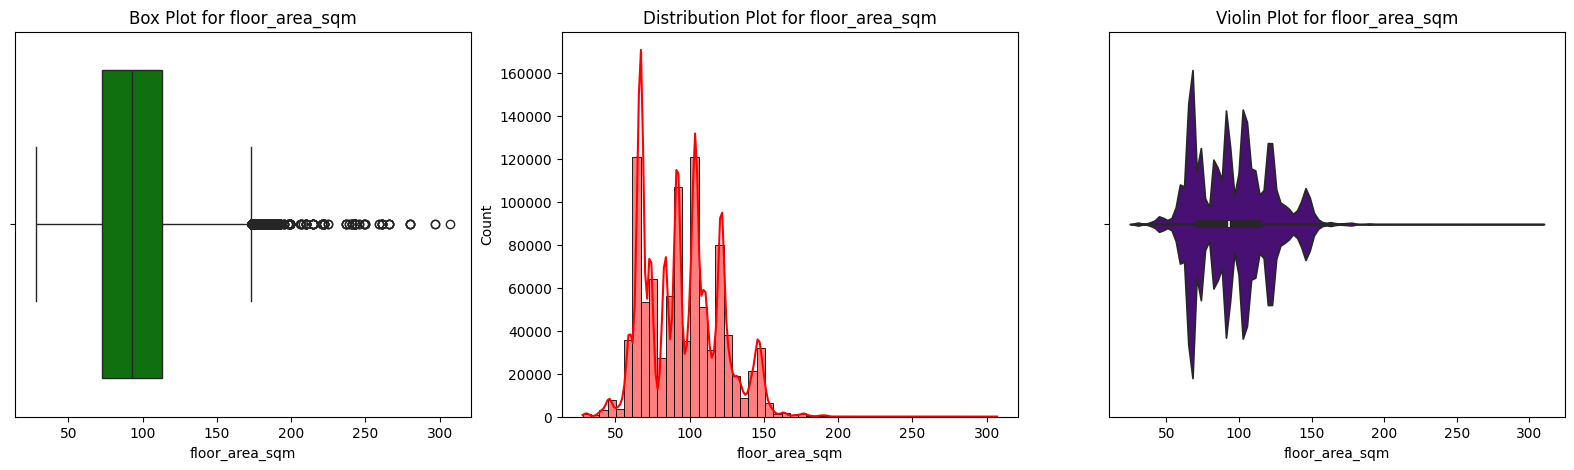

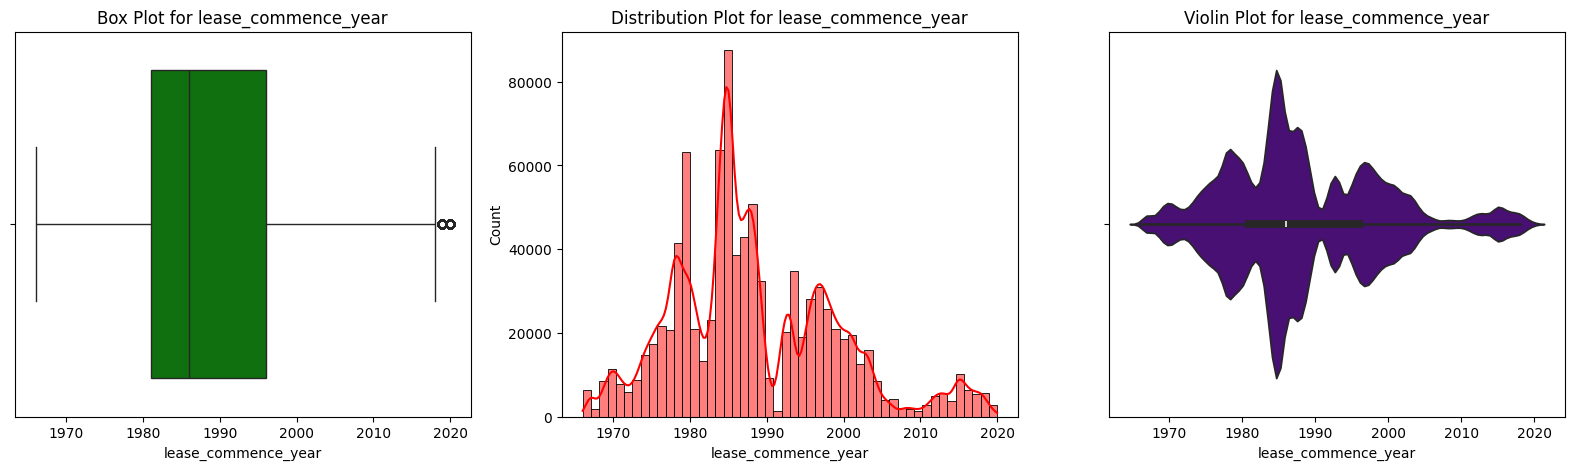

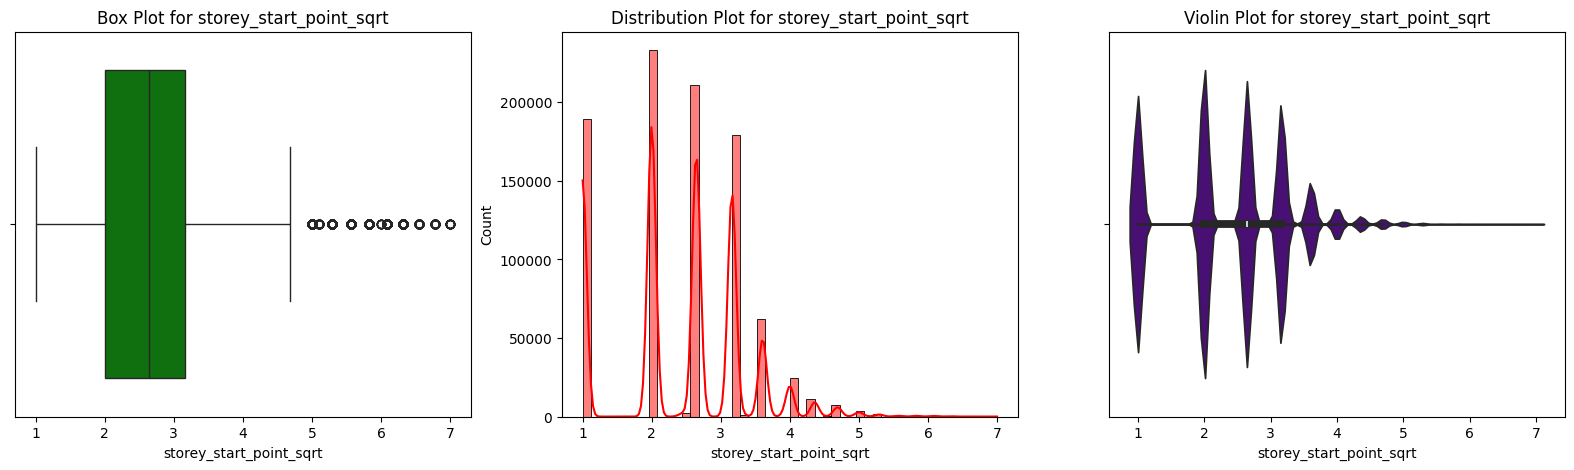

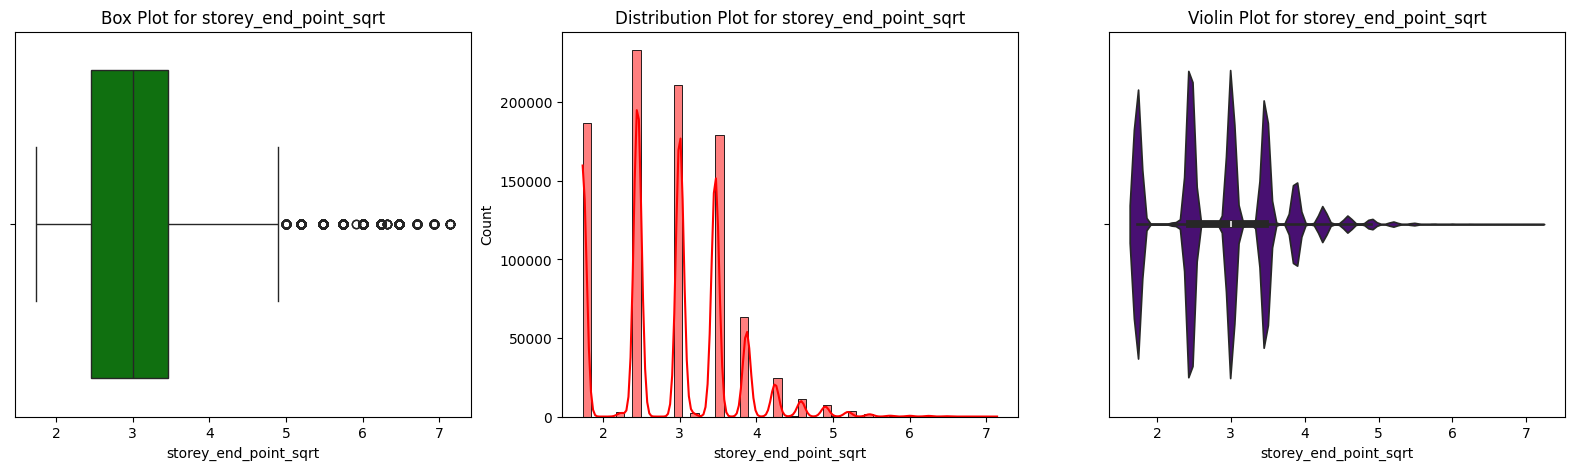

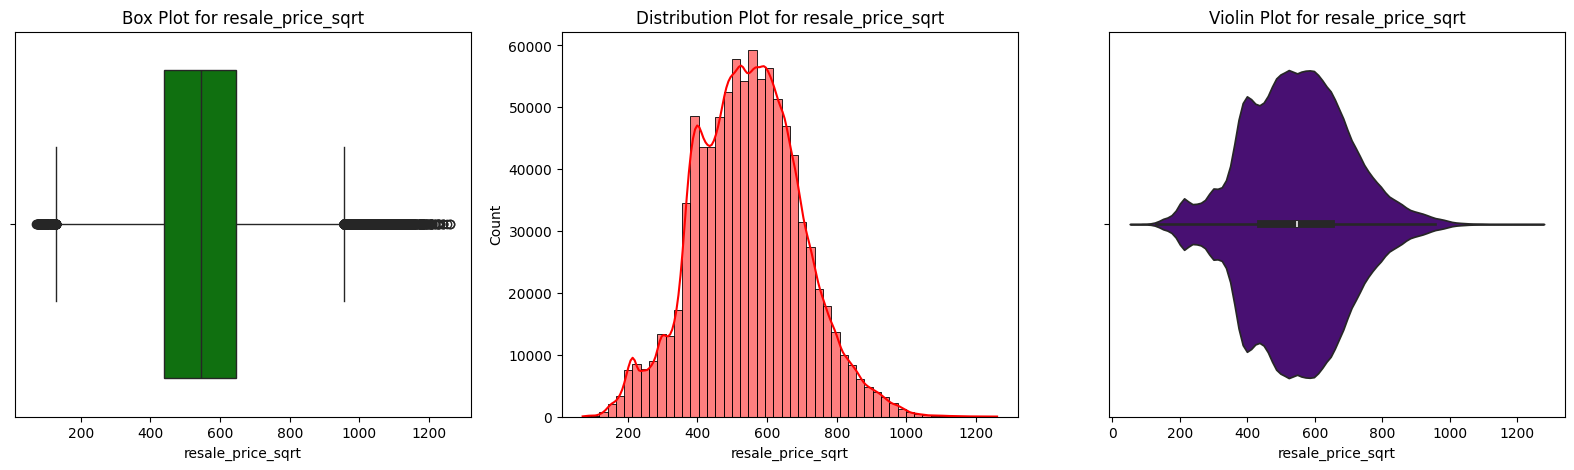

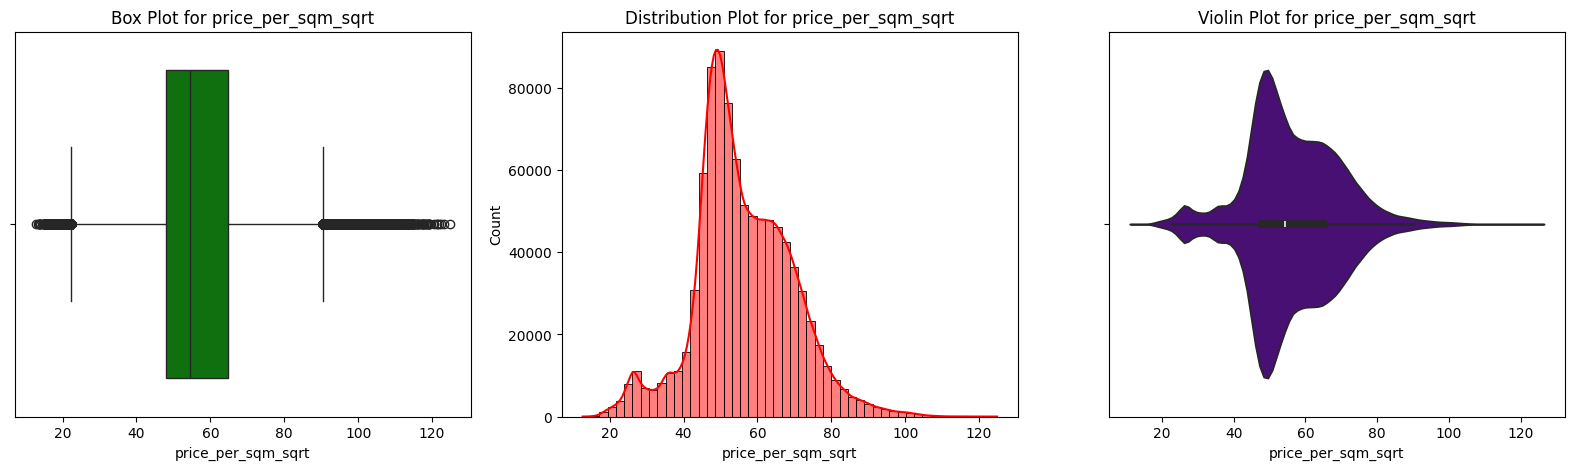

In [22]:
# plotting the features to check skew and outliers

for col in ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']:
    plot(resale_df, col)

In [23]:
# Outliers Treatment

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.75)
    IQR = Q2 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q2 + 1.5 * IQR
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Apply the IQR method to continuous variables
continuous_var = ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']
for col in continuous_var:
    resale_df = remove_outliers_iqr(resale_df, col)

# Check the shape of the dataframe after outlier removal
print(f"Reshaped Dataframe after Outlier Treatment: {resale_df.shape}")

# Reset the index
resale_df.reset_index(drop=True, inplace=True)

Reshaped Dataframe after Outlier Treatment: (902902, 14)


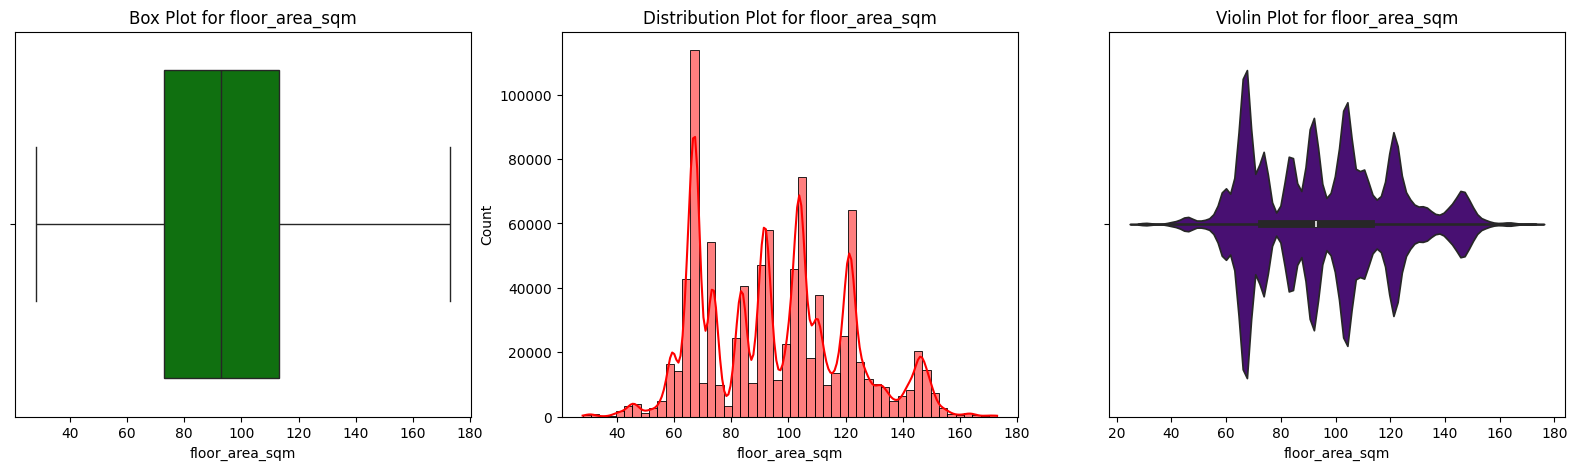

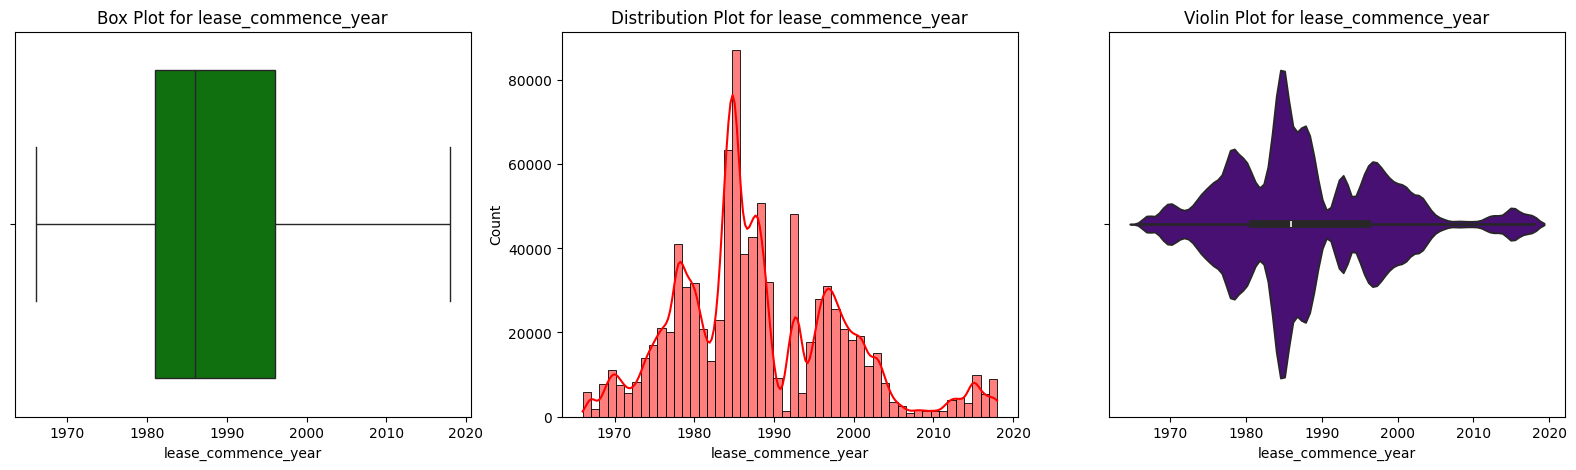

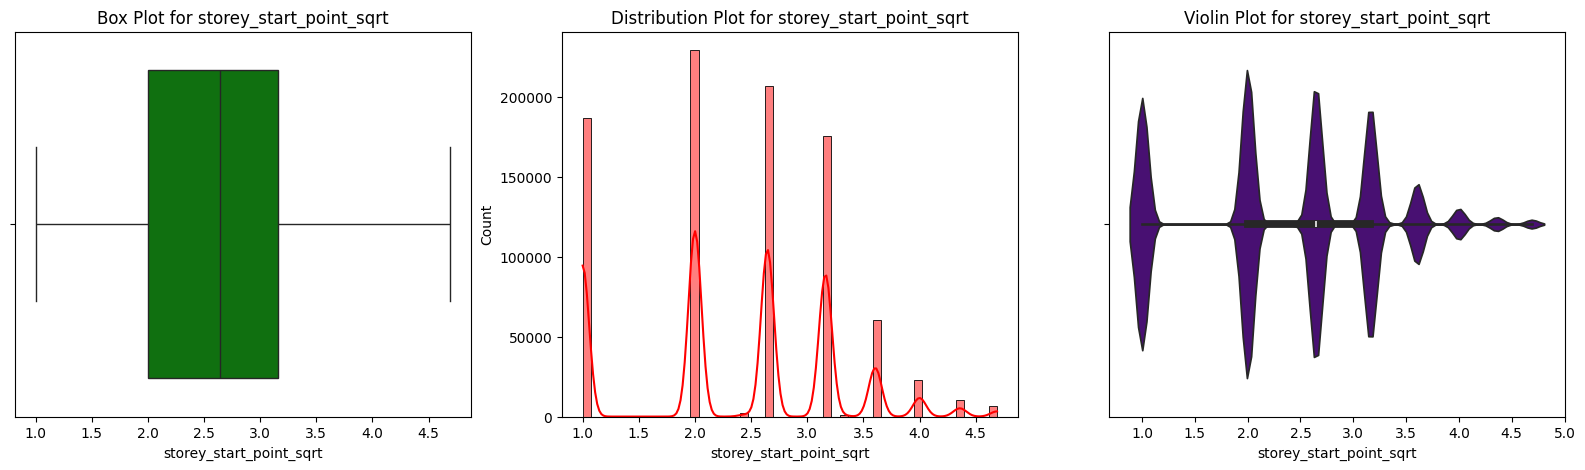

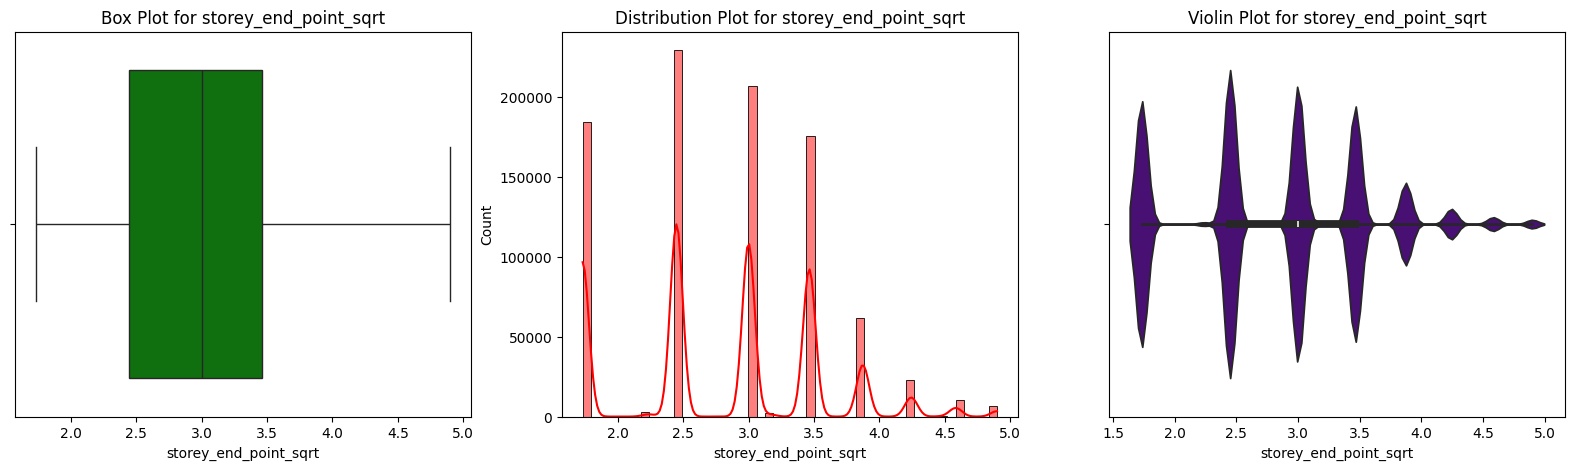

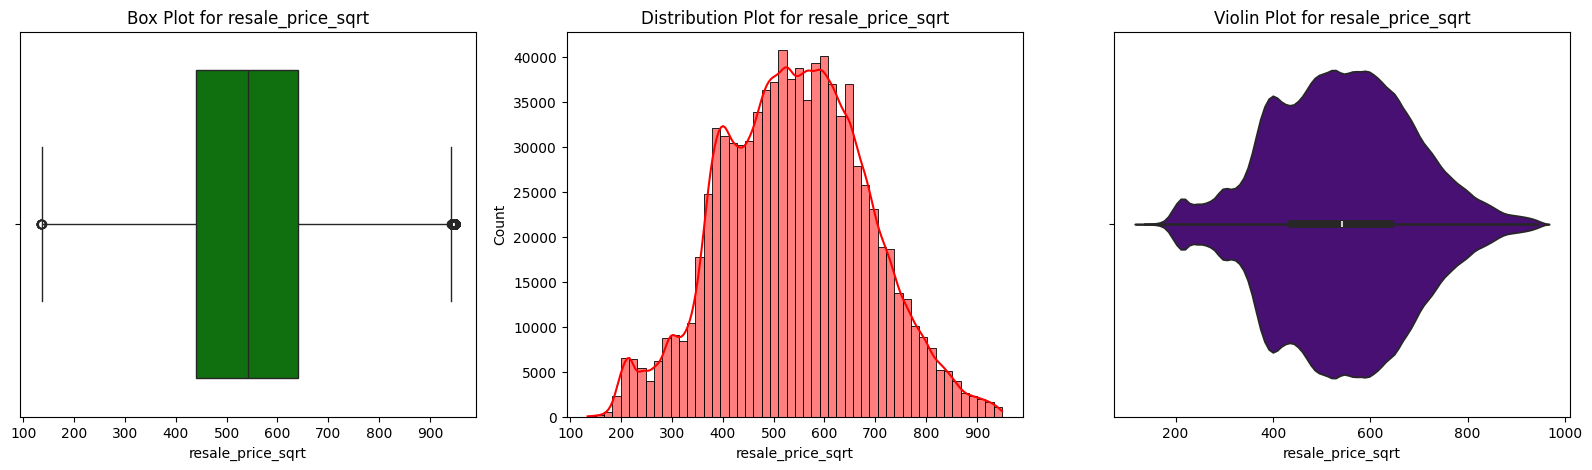

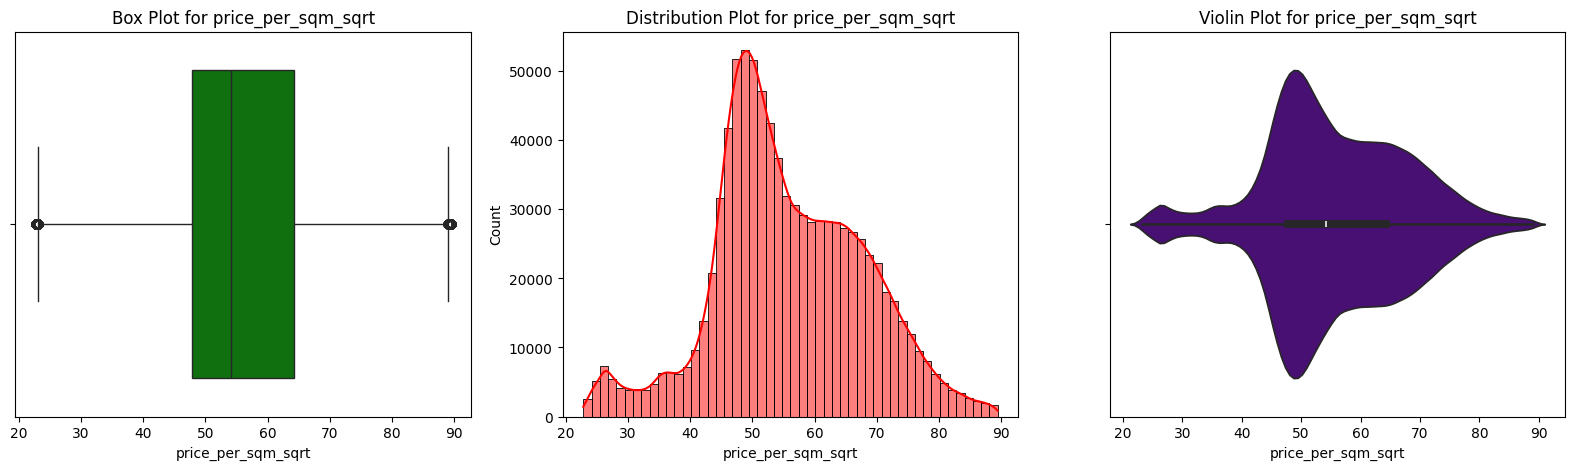

In [24]:
# plotting the features to check skew and outliers

for col in ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']:
    plot(resale_df, col)

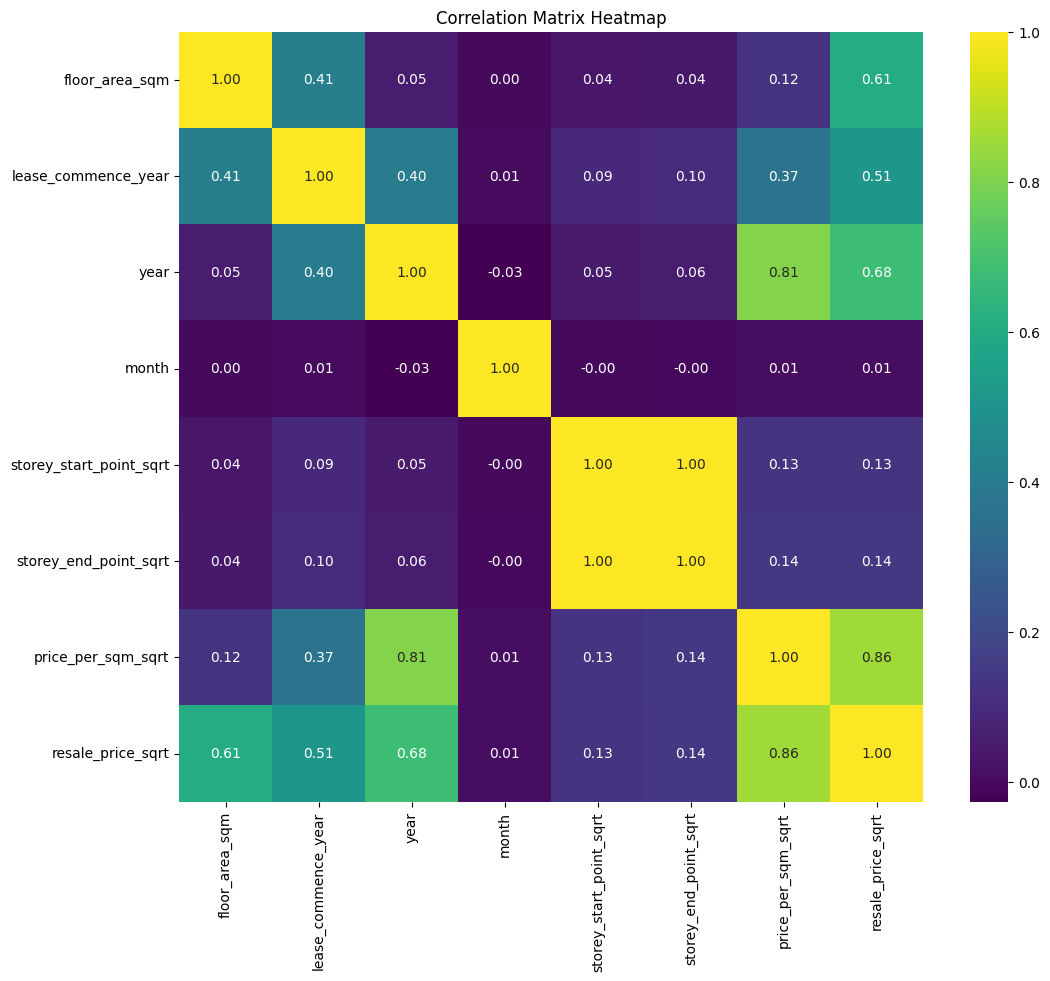

In [25]:
correlation_matrix = resale_df[['floor_area_sqm', 'lease_commence_year', 'year', 'month', 'storey_start_point_sqrt','storey_end_point_sqrt', 'price_per_sqm_sqrt','resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

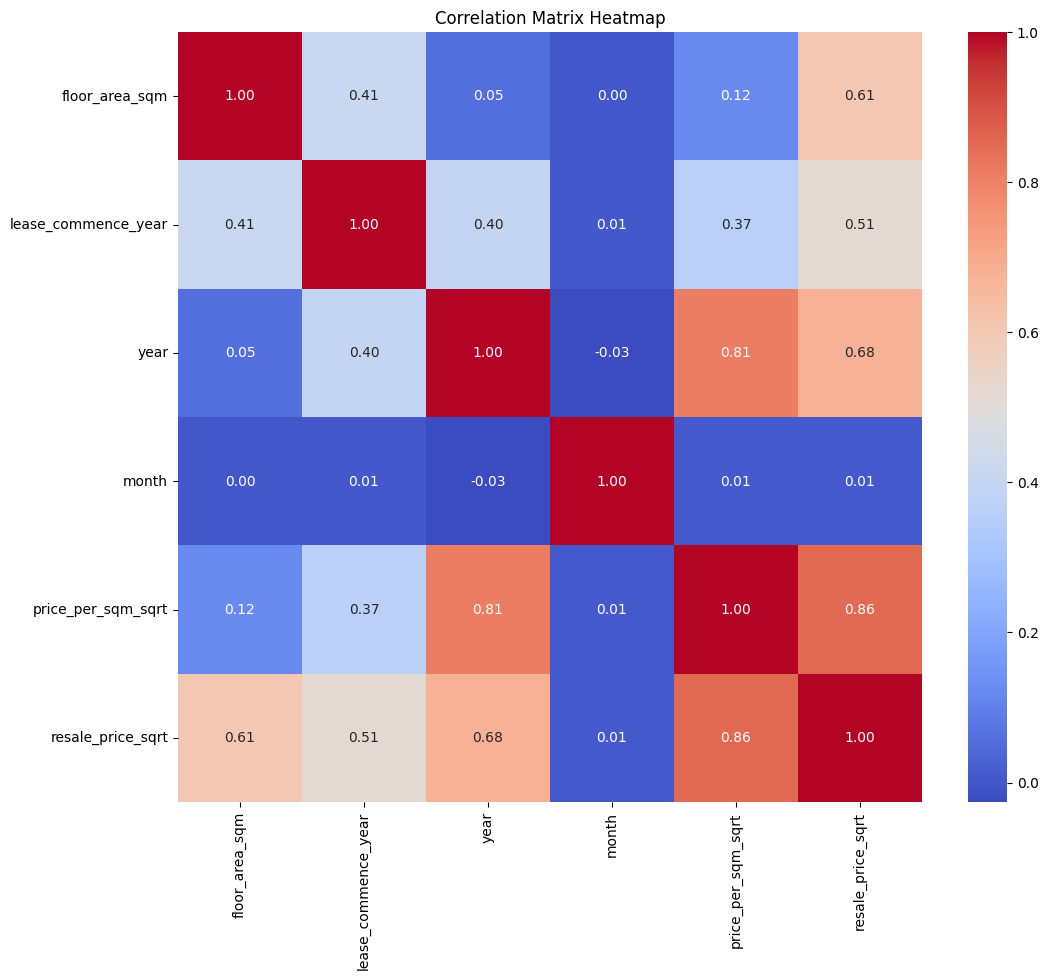

In [26]:
correlation_matrix = resale_df[['floor_area_sqm', 'lease_commence_year', 'year', 'month', 'price_per_sqm_sqrt','resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
resale_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,storey_start_point_sqrt,storey_end_point_sqrt,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,54,2.000000,2.449490,25.416530,217.255610
1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,1.000000,1.732051,26.191602,214.476106
2,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,2.645751,3.000000,25.019992,204.939015
3,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,3.162278,3.464102,23.811762,194.935887
4,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,2.000000,2.449490,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902897,YISHUN,4 ROOM,719,YISHUN ST 71,84.0,Simplified,1987,2024,7,54,2.645751,3.000000,77.149206,707.106781
902898,YISHUN,5 ROOM,776,YISHUN AVE 2,132.0,Improved,1986,2024,7,54,2.645751,3.000000,72.711760,835.463943
902899,YISHUN,5 ROOM,508B,YISHUN AVE 4,113.0,Improved,2018,2024,7,54,2.000000,2.449490,78.140898,830.662386
902900,YISHUN,5 ROOM,674B,YISHUN AVE 4,112.0,Improved,2018,2024,7,54,1.000000,1.732051,76.177424,806.225775


# Machine_Learning

In [28]:
price_df=resale_df.copy()
price_df.drop(columns=['storey_start_point_sqrt','storey_end_point_sqrt'], inplace=True)
price_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,54,25.416530,217.255610
1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,26.191602,214.476106
2,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,25.019992,204.939015
3,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,23.811762,194.935887
4,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,24.433583,200.000000


In [29]:
# Checking length before Encoding:

print(len(price_df['town'].unique()))
print(len(price_df['flat_type'].unique()))
print(len(price_df['block'].unique()))
print(len(price_df['street_name'].unique()))
print(len(price_df['flat_model'].unique()))

27
8
2627
579
34


In [30]:
# Pre-Processing:

# dropping hypen:
price_df['flat_type']=price_df['flat_type'].str.replace("-"," ")

# Deal with capitalized values
price_df['flat_model'] = price_df['flat_model'].str.lower()

In [31]:
from sklearn.preprocessing import LabelEncoder

def encode(df,columns):
    le = LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    keys =le.classes_
    values = le.transform(keys)

    for key,value in zip(keys,values):
        print(key,":",value)

In [32]:
encode(price_df,'town')
encode(price_df,'flat_type')
encode(price_df,'flat_model')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26
1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI GENERATION : 6
2-room : 0
3gen : 1
adjoined flat : 2
apartment : 3
dbss : 4
improved : 5
improved-maisonette : 6
maisonette : 7
model a : 8
model a-maisonette : 9
model a2 : 10
multi generation : 11
new generation : 12
premium apartment : 13
premium apartment loft : 14
premium maisonette : 15
simplified : 16
standard : 17
terrace : 18
type s1 : 19
type s2 : 20


In [33]:
price_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,216,ANG MO KIO AVE 1,73.0,12,1976,1990,1,54,25.416530,217.255610
1,0,2,211,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,26.191602,214.476106
2,0,2,202,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,25.019992,204.939015
3,0,2,235,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,23.811762,194.935887
4,0,2,235,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902897,26,3,719,YISHUN ST 71,84.0,16,1987,2024,7,54,77.149206,707.106781
902898,26,4,776,YISHUN AVE 2,132.0,5,1986,2024,7,54,72.711760,835.463943
902899,26,4,508B,YISHUN AVE 4,113.0,5,2018,2024,7,54,78.140898,830.662386
902900,26,4,674B,YISHUN AVE 4,112.0,5,2018,2024,7,54,76.177424,806.225775


In [34]:
price_df.drop(columns=['block','street_name'], inplace=True)

In [35]:
price_df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,73.0,12,1976,1990,1,54,25.416530,217.255610
1,0,2,67.0,12,1977,1990,1,54,26.191602,214.476106
2,0,2,67.0,12,1977,1990,1,54,25.019992,204.939015
3,0,2,67.0,12,1977,1990,1,54,23.811762,194.935887
4,0,2,67.0,12,1977,1990,1,54,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...
902897,26,3,84.0,16,1987,2024,7,54,77.149206,707.106781
902898,26,4,132.0,5,1986,2024,7,54,72.711760,835.463943
902899,26,4,113.0,5,2018,2024,7,54,78.140898,830.662386
902900,26,4,112.0,5,2018,2024,7,54,76.177424,806.225775


In [36]:
# function to choose the best algorithm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['resale_price_sqrt'],axis=1)
        y=df['resale_price_sqrt']

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(X_train,y_train)
                y_pred=model.predict(X_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results

In [37]:

# using above function try to identify the best algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor]
best_algorithm, results = best_ML_algorithm(price_df, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                     10.375762          236.203001                15.368897  0.988282
DecisionTreeRegressor                 0.090604            0.386955                 0.622057  0.999981
ExtraTreesRegressor                   0.074524            0.159903                 0.399878  0.999992
RandomForestRegressor                 0.067502            0.114278                 0.338051  0.999994
GradientBoostingRegressor             4.399982           33.712297                 5.806229  0.998328
**Best Algorithm:** RandomForestRegressor


# Regression Model

In [38]:
from sklearn.ensemble import RandomForestRegressor

#Features & Target:
x=price_df.drop(columns=['resale_price_sqrt'],axis=1)
y=price_df['resale_price_sqrt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training:
model = RandomForestRegressor(n_estimators=150,max_depth=20)
model.fit(X_train, y_train)

# Prediction:
y_predict = model.predict(X_test)

# Evaluation:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))
print('R² score: {:.4f}'.format(r2))

Mean Absolute Error: 0.0663
Mean Squared Error: 0.1138
Root Mean Squared Error: 0.3373
R² score: 1.0000


In [39]:
from sklearn.tree import DecisionTreeRegressor

#Features & Target:
x=price_df.drop(columns=['resale_price_sqrt'],axis=1)
y=price_df['resale_price_sqrt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

# Prediction:
y_predict = model.predict(X_test)

# Evaluation:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))
print('R² score: {:.4f}'.format(r2))

Mean Absolute Error: 0.0911
Mean Squared Error: 0.3894
Root Mean Squared Error: 0.6241
R² score: 1.0000


In [40]:

#checking the features scores and importants

feature_scores = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_sqrt     7.287756e-01
floor_area_sqm         2.413642e-01
flat_type              2.985410e-02
lease_commence_year    2.114303e-06
year                   1.358406e-06
flat_model             1.121226e-06
month                  7.294910e-07
town                   7.000548e-07
remaining_lease        0.000000e+00
dtype: float64

In [41]:
# Pickling Regression model:

import pickle

with open("model_SG_resale_price.pkl","wb") as files:
    pickle.dump(model, files)

In [42]:
price_df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,73.0,12,1976,1990,1,54,25.416530,217.255610
1,0,2,67.0,12,1977,1990,1,54,26.191602,214.476106
2,0,2,67.0,12,1977,1990,1,54,25.019992,204.939015
3,0,2,67.0,12,1977,1990,1,54,23.811762,194.935887
4,0,2,67.0,12,1977,1990,1,54,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...
902897,26,3,84.0,16,1987,2024,7,54,77.149206,707.106781
902898,26,4,132.0,5,1986,2024,7,54,72.711760,835.463943
902899,26,4,113.0,5,2018,2024,7,54,78.140898,830.662386
902900,26,4,112.0,5,2018,2024,7,54,76.177424,806.225775


In [43]:
#load the pickle:

with open('model_SG_resale_price.pkl','rb') as files:
    predict_model=pickle.load(files)

In [44]:
#predict the Resale price with regressor model

input=predict_model.predict(np.array([[0,2,73.0,12,1976,1990,1,54,25.416530]]))
predict_resale_price = input[0] ** 2

print(f"Predicted Resale Price: {predict_resale_price:.2f}")

Predicted Resale Price: 47200.00


In [45]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
!pip freeze > requirements.txt